In [2]:
#reading in dataframes.
import pandas as pd

numData = pd.read_csv(r'C:\Users\Gamer Kyle\Desktop\datasets\numDataNew.csv')
catData = pd.read_csv(r'C:\Users\Gamer Kyle\Desktop\datasets\catDataNew.csv')
ordData = pd.read_csv(r'C:\Users\Gamer Kyle\Desktop\datasets\ordDataNew.csv')
combData = pd.read_csv(r'C:\Users\Gamer Kyle\Desktop\datasets\combData2.csv')

In [4]:
#Detection Information Gain

#Creating training
from sklearn.model_selection import train_test_split
y = numData[['catOdds']]
X = numData.drop(['avgOdds','zscore','catOdds'], axis=1)

#Training class with 70% training. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

#Generating a list of descending info gain
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)



C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


catOddsNUm                1.389186
defencePressure           0.056380
buildUpPlayPassing        0.054123
chanceCreationPassing     0.046418
chanceCreationShooting    0.044736
chanceCreationCrossing    0.037923
buildUpPlaySpeed          0.032668
defenceTeamWidth          0.030954
defenceAggression         0.026313
dtype: float64

In [7]:
from pandas_profiling import ProfileReport

#checking EDA of combData in order to detect correlation amongst combined variables. 
profile = ProfileReport(combData, title = "combData")
profile.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Accuracy: 0.14505653115227327
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.13      0.16      0.15      6373
           2       0.24      0.21      0.22      6498
           3       0.33      0.19      0.24      6404
           4       0.00      0.00      0.00      5667

    accuracy                           0.15     24942
   macro avg       0.14      0.11      0.12     24942
weighted avg       0.18      0.15      0.16     24942



C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamer Kyle\anaconda3\lib\site-packages\

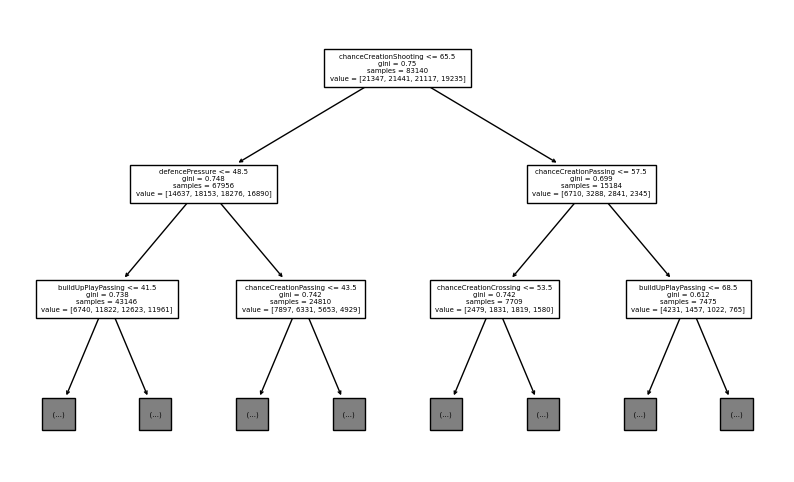

<Figure size 5000x5000 with 0 Axes>

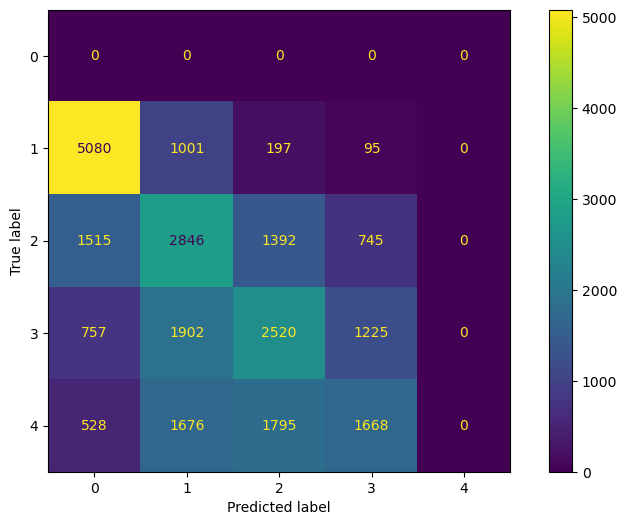

In [48]:
#Decision Tree as feature selection and baseline modelling
df = numData
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']

X = df[inputs]
y = df['catOddsNUm']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

#Generating the Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y_transformed)

tree.plot_tree(clf, feature_names=inputs,max_depth=2,fontsize=5)
plt.figure(figsize=(50,50))
plt.savefig('tree',dpi=100)

from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

In [23]:
#Using Chi squared k select
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from numpy import array 
 
myData = SelectKBest(score_func=chi2,k=6).fit_transform(X,y)
print(myData[:5])
print(X.head())

[[45 45 65 40 50 40]
 [40 65 70 45 45 65]
 [54 46 55 40 50 56]
 [38 46 37 49 49 56]
 [54 49 56 42 41 56]]
   buildUpPlaySpeed  buildUpPlayPassing  chanceCreationPassing  \
0                70                  45                     45   
1                65                  40                     65   
2                46                  54                     46   
3                46                  38                     46   
4                46                  54                     49   

   chanceCreationCrossing  chanceCreationShooting  defencePressure  \
0                      70                      65               40   
1                      65                      70               45   
2                      60                      55               40   
3                      68                      37               49   
4                      72                      56               42   

   defenceAggression  defenceTeamWidth  
0                 50               

Accuracy: 0.1486649025739716
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.14      0.15      0.14      6373
           2       0.24      0.22      0.23      6498
           3       0.32      0.20      0.24      6404
           4       0.00      0.00      0.00      5667

    accuracy                           0.15     24942
   macro avg       0.14      0.12      0.12     24942
weighted avg       0.18      0.15      0.16     24942



C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamer Kyle\anaconda3\lib\site-packages\

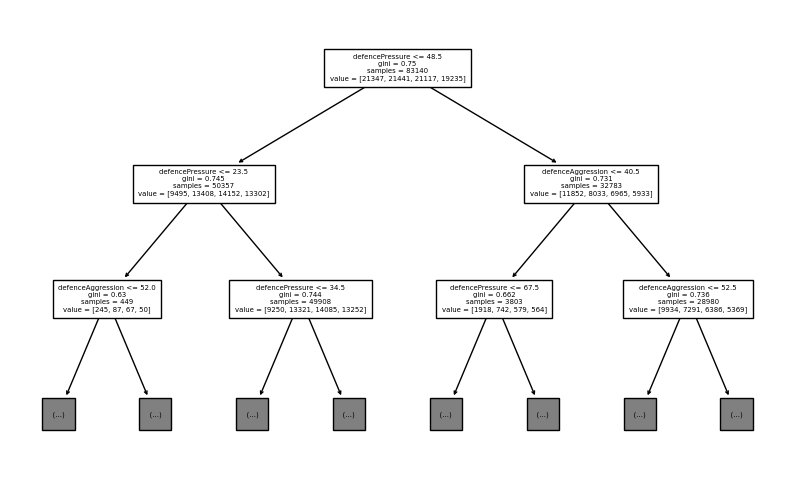

<Figure size 5000x5000 with 0 Axes>

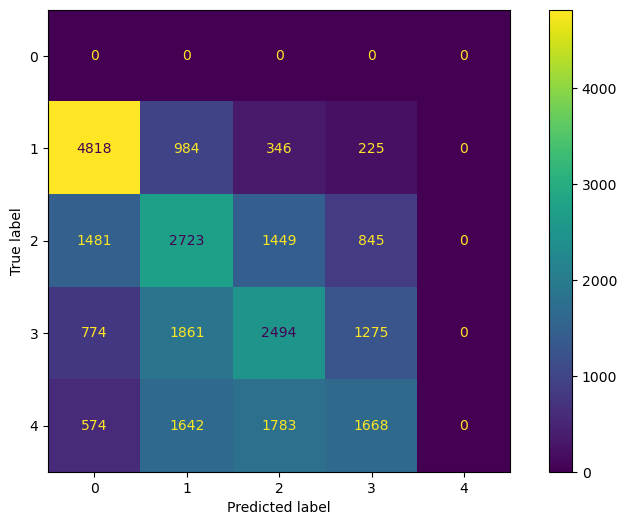

In [49]:
#Creating the various models for Model Building + Analysis step

#Decision Tree for defensive model
#Decision tree for baseline is already created above so here I will simply create it for just the defense.
inputs = ['defencePressure','defenceAggression','defenceTeamWidth']

Xdef = df[inputs]
y = df['catOddsNUm']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdef, y, test_size=0.3, random_state=88)


#Generating the tree
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xdef, y_transformed)

tree.plot_tree(clf, feature_names=inputs,max_depth=2,fontsize=5)
plt.figure(figsize=(50,50))
plt.savefig('tree',dpi=100)


from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

Accuracy: 0.14569801940501964
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.13      0.15      0.14      6373
           2       0.24      0.21      0.22      6498
           3       0.33      0.20      0.25      6404
           4       0.00      0.00      0.00      5667

    accuracy                           0.15     24942
   macro avg       0.14      0.11      0.12     24942
weighted avg       0.18      0.15      0.16     24942



C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamer Kyle\anaconda3\lib\site-packages\

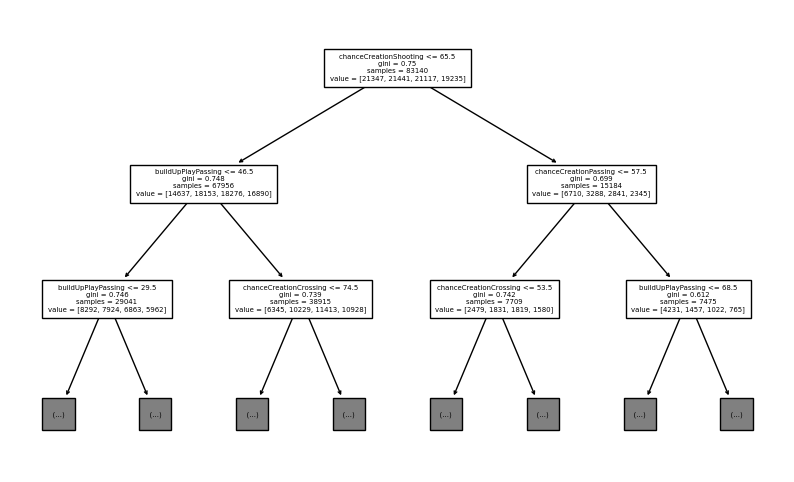

<Figure size 5000x5000 with 0 Axes>

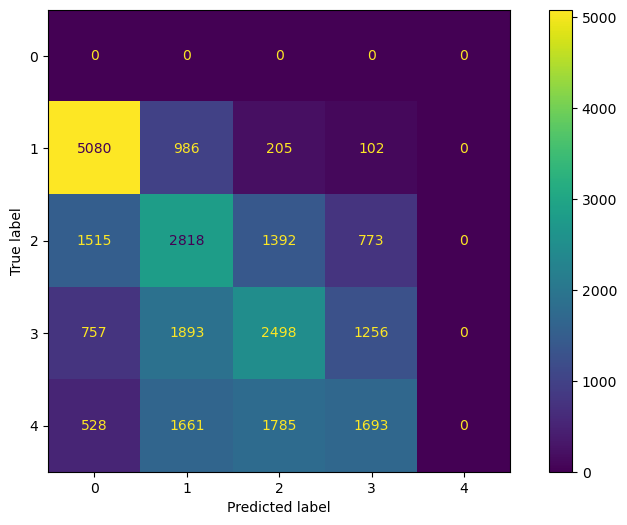

In [50]:
#Creating the various models for Model Building + Analysis step

#Decision Tree for non-defensive model
#Decision tree for baseline is already created above so here I will simply create it for just the defense.
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting']

Xdef = df[inputs]
y = df['catOddsNUm']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdef, y, test_size=0.3, random_state=88)


#Generating the tree
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xdef, y_transformed)

tree.plot_tree(clf, feature_names=inputs,max_depth=2,fontsize=5)
plt.figure(figsize=(50,50))
plt.savefig('tree',dpi=100)


from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

Accuracy: 0.46215219308796407
              precision    recall  f1-score   support

           1       0.65      0.78      0.71      6373
           2       0.37      0.41      0.39      6498
           3       0.38      0.33      0.35      6404
           4       0.39      0.32      0.35      5667

    accuracy                           0.46     24942
   macro avg       0.45      0.46      0.45     24942
weighted avg       0.45      0.46      0.45     24942



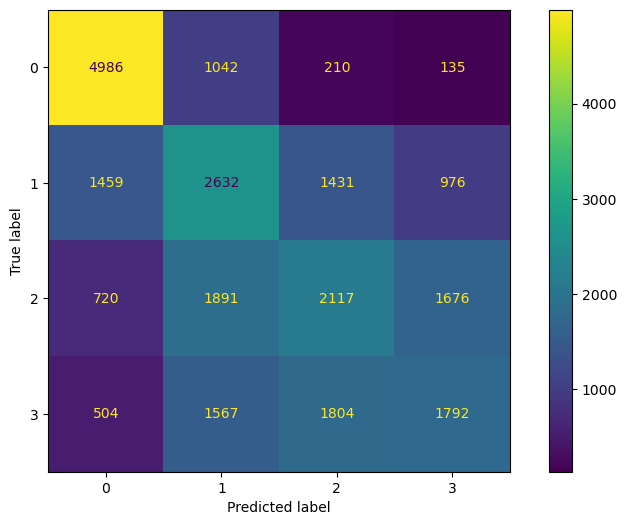

In [46]:
#Random Forest Classifier - Baseline 

#importing everything
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

#training with 70:30 ratio:
df = numData
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']

X = df[inputs]
y = df['catOddsNUm']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

baselineRF = RandomForestClassifier()
baselineRF.fit(X_train, y_train)

#Accuracy Testing
y_pred = baselineRF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report
result1 = metrics.classification_report(y_test, y_pred)
print(result1)


Accuracy: 0.4516077299334456
              precision    recall  f1-score   support

           1       0.64      0.74      0.69      6373
           2       0.36      0.39      0.38      6498
           3       0.38      0.35      0.36      6404
           4       0.38      0.31      0.34      5667

    accuracy                           0.45     24942
   macro avg       0.44      0.45      0.44     24942
weighted avg       0.44      0.45      0.44     24942



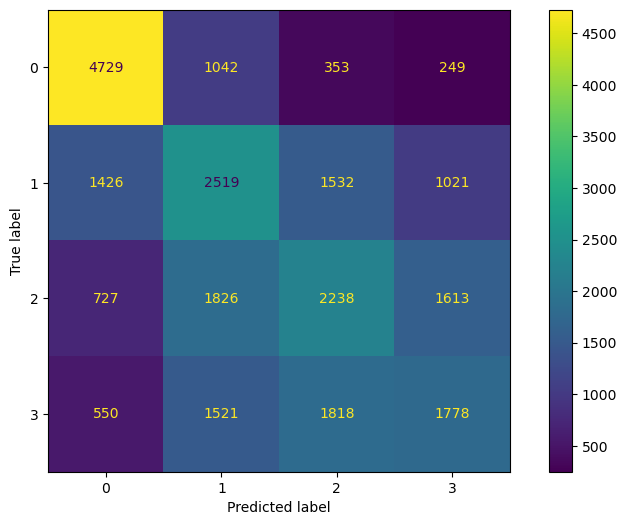

In [45]:
#Random Forest - defense model

#training with 70:30 ratio:
df = numData
inputs = ['defencePressure','defenceAggression','defenceTeamWidth']

X = df[inputs]
y = df['catOddsNUm']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

baselineRF = RandomForestClassifier()
baselineRF.fit(X_train, y_train)

#Accuracy Testing
y_pred = baselineRF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

Accuracy: 0.4638360997514233
              precision    recall  f1-score   support

           1       0.65      0.78      0.71      6373
           2       0.37      0.39      0.38      6498
           3       0.38      0.33      0.36      6404
           4       0.39      0.33      0.36      5667

    accuracy                           0.46     24942
   macro avg       0.45      0.46      0.45     24942
weighted avg       0.45      0.46      0.45     24942



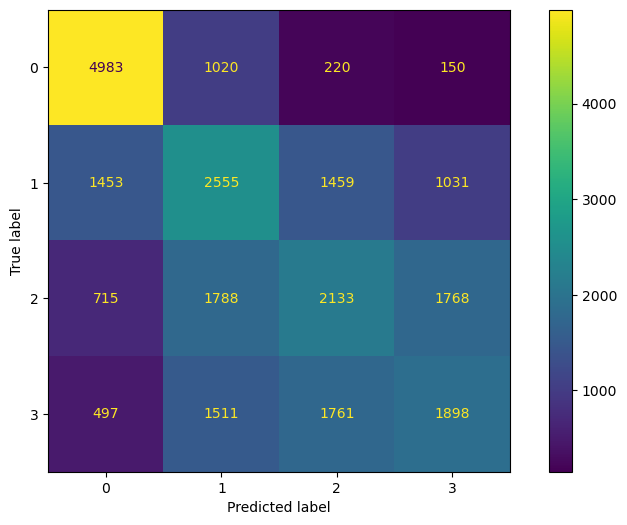

In [44]:
#Random Forest - non-defense model

#training with 70:30 ratio:
df = numData
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting']

X = df[inputs]
y = df['catOddsNUm']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

baselineRF = RandomForestClassifier()
baselineRF.fit(X_train, y_train)

#Accuracy Testing
y_pred = baselineRF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.4182503407906343
                       precision    recall  f1-score   support

Almost Guaranteed Win       0.60      0.72      0.66      6373
           Likely win       0.32      0.40      0.36      6498
          Likley loss       0.34      0.33      0.34      5667
         Unlikely win       0.36      0.21      0.26      6404

             accuracy                           0.42     24942
            macro avg       0.41      0.42      0.40     24942
         weighted avg       0.41      0.42      0.41     24942



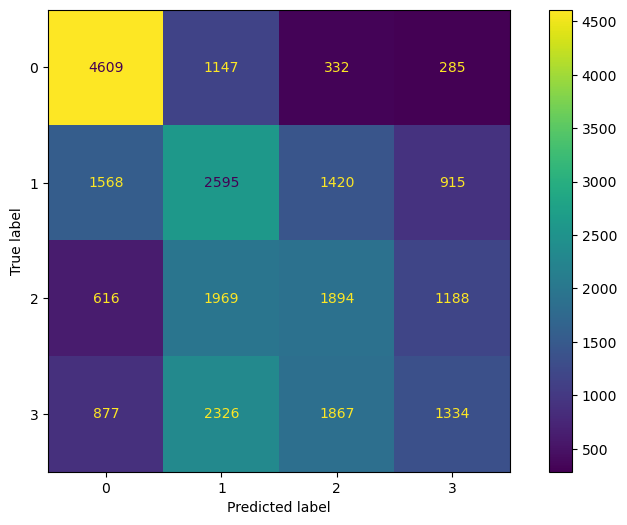

In [52]:
#KNN Analysis - Baseline 

df = numData
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']
X = df[inputs]
y = df['catOdds']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

#Doing KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


#Checking Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report:
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.40782615668350575
                       precision    recall  f1-score   support

Almost Guaranteed Win       0.56      0.72      0.63      6373
           Likely win       0.32      0.34      0.33      6498
          Likley loss       0.34      0.31      0.32      5667
         Unlikely win       0.34      0.25      0.29      6404

             accuracy                           0.41     24942
            macro avg       0.39      0.41      0.39     24942
         weighted avg       0.39      0.41      0.40     24942



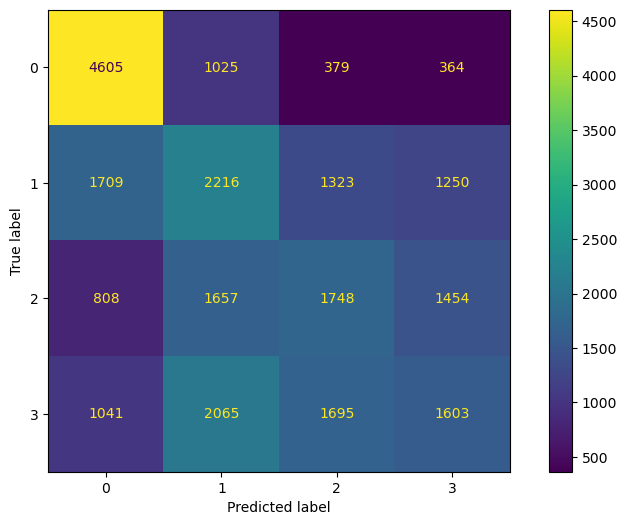

In [54]:
#KNN Analysis - Defensive 

df = numData
inputs = ['defencePressure','defenceAggression','defenceTeamWidth']
X = df[inputs]
y = df['catOdds']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

#Doing KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


#Checking Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report:
result1 = metrics.classification_report(y_test, y_pred)
print(result1)

C:\Users\Gamer Kyle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.41756875952209127
                       precision    recall  f1-score   support

Almost Guaranteed Win       0.61      0.74      0.67      6373
           Likely win       0.32      0.35      0.34      6498
          Likley loss       0.34      0.32      0.33      5667
         Unlikely win       0.34      0.25      0.29      6404

             accuracy                           0.42     24942
            macro avg       0.40      0.42      0.40     24942
         weighted avg       0.40      0.42      0.41     24942



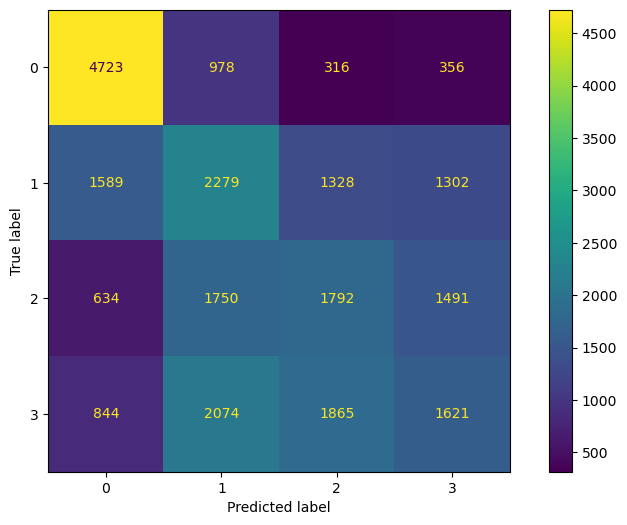

In [53]:
#KNN Analysis - non-Defensive 

df = numData
inputs = ['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting']
X = df[inputs]
y = df['catOdds']

#Creating training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

#Doing KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


#Checking Accuracy
from sklearn import metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Classification Report:
result1 = metrics.classification_report(y_test, y_pred)
print(result1)